# MNIST

## Project Description
MNIST (Modified National Institute of Standards and Technology) dataset is a set of 70,000 small images of digits handwritten by high school students. Each image is labeled with the digit it represent. Each image is 28$x$28 pixels; so it has 784 features (variables). Each feature represents one pixel's intensity, from 0 (black) to 255(white).<br>
MNIST is a very popular dataset and you can download them from Sci-Kit-Learn library.
https://en.wikipedia.org/wiki/MNIST_database

## Importing the data
<font color=red> This is a large dataset, be patient and wait until it finish fetching the data from the server.

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1, parser='auto')

## Seperating the Input and Output

In [2]:
X=mnist['data']
y=mnist['target']  # in the original dataset, the label's column is named, "target"

In [3]:
# Some quick checking...
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
# a quick check of X
import pandas as pd
pd.DataFrame(X)
# lots of numbers between 0-255

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the Data

Let's just take a look at some of these images:

In [6]:
Example=X.iloc[7,:].values
len(Example)

784

Note that, X is a 1D array of 784 values. We can reshape it to 28x28 and plot it. 

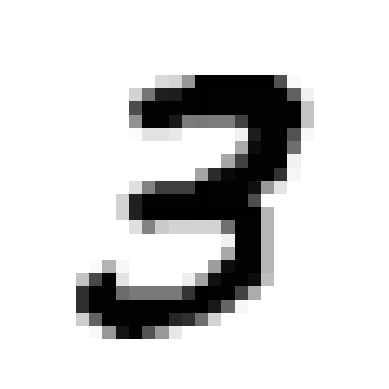

In [7]:
import matplotlib.pyplot as plt
Example_Image=Example.reshape(28,28)

plt.imshow(Example_Image, cmap='binary')
plt.axis('off')
plt.show()

This looks like a 3; but let's see what the actual label tells us:

In [8]:
y[7]

'3'

<font color=red> Note: <font color=black> The label is a "String" which you can simply convert it to an integer:

In [9]:
import numpy as np
y=y.astype(np.uint8)

In Python, uint8 means: Unsigned integer type, and uint8 is compatible with C ``: 8-bit unsigned integer (0 to 255).

In [10]:
# Here we can see, y has values of 0-9
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8


## Splitting the Data to Training and Test Set
The MNIST dataset is already split into a training set (the first 60,000 images) and test set (the last 10,000 images). The training set is also already shuffled. 

In [11]:
X_train, X_test, y_train, y_test=X[0:60000],X[60000:70000],y[0:60000],y[60000:70000]

##  Classifiers
Here, we just want to try Some algorithms, such as Random Forest, Naive Bayes, SVM, and XGBoost classifiers. <br> 
<font color=red> Note: <font color=blue> It takes time for each classifier to run (since we have a large dataset (60,000 images) and each images has 784 features). So, you need to wait for a couple of minutes or so (depends on your computer speed) untill it finishes before moving to the next cell.

### SVM Classifier

In [26]:
from sklearn.svm import SVC
SV_Classifier=SVC()
SV_Classifier.fit(X_train, y_train)


SVC()

In [49]:
# Predict the target values for the testing set
y_pred = SV_Classifier.predict(X_test)



In [46]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing set:", test_accuracy*100, "%")

Accuracy on the testing set: 97.92 %


#### Use the Model to Predict

##### An example to try:


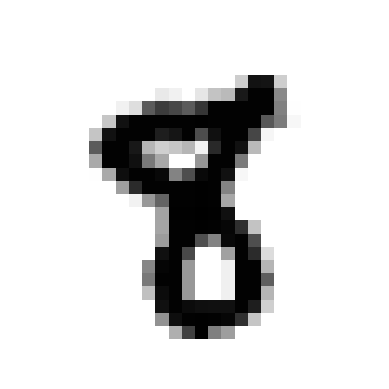

In [42]:
Example=X.iloc[12890,:].values
Example_Image=Example.reshape(28,28)
plt.imshow(Example_Image, cmap='binary')
plt.axis('off')
plt.show()

##### Model Prediction
Let's see how our model labels this number:

In [43]:
print('Your Number is:', SV_Classifier.predict([Example]))

Your Number is: [8]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF_Classifier=RandomForestClassifier()
RF_Classifier.fit(X_train, y_train)

RandomForestClassifier()

#### Use the Model to Predict

##### An example to try:

In [69]:
print('Your Number is:', RF_Classifier.predict([Example]))

Your Number is: [8]


### Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import MultinomialNB
NB_Classifier=MultinomialNB()
NB_Classifier.fit(X_train, y_train)

MultinomialNB()

#### Use the Model to Predict

In [71]:
print('Your Number is:', NB_Classifier.predict([Example]))

Your Number is: [8]


### KNN Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier=KNeighborsClassifier()
KNN_Classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### Use the Model to Predict

In [73]:
print('Your Number is:', KNN_Classifier.predict([Example]))

Your Number is: [8]


### SGD Classifier

In [74]:
from sklearn.linear_model import SGDClassifier
SGD_Clssifier=SGDClassifier(random_state=0)
SGD_Clssifier.fit(X_train,y_train)

SGDClassifier(random_state=0)

#### Use the Model to Predict

In [75]:
print('Your Number is:', SGD_Clssifier.predict([Example]))

Your Number is: [8]


### XGBoost Classifier

In [18]:
import xgboost as xgb

In [50]:
# Initialize and train the XGBoost classifier
xg_classifier = xgb.XGBClassifier(objective ='multi:softmax', num_class=10, random_state=42)
xg_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=10,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Predict the target values for the testing set
y_pred = xg_classifier.predict(X_test)

# Calculate the accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing set:", test_accuracy)

# Optional - How to use GPU

# .... We see the codes above are very slow, ...

Ask ChatGPT:
I am a data scientist, and try to apply the XGBoost Classifier to the MINST Digital dataset. I wrote the above code after importing the dataset and split into Train and Test set; it works, but it is very slow. How can I write this XGBoost to work faster

To optimize the training of your XGBoost classifier on the MNIST dataset and improve its speed, you can try the following techniques:

Optimize Hyperparameters:
Tune the hyperparameters of the XGBoost model to find the best combination for your dataset. This can significantly impact the model's performance and training time.

Use Parallelization:
XGBoost allows for parallelization during training. You can set the n_jobs parameter to utilize multiple cores for training, which can speed up the process.

Use GPU Acceleration:
If you have access to a GPU, you can enable GPU acceleration in XGBoost by setting the tree_method parameter to 'gpu_hist'. This can greatly accelerate the training process.

Use Early Stopping:
Implement early stopping to stop training once the model's performance plateaus. This can save time by avoiding unnecessary training iterations.

Here's an updated version of your code incorporating these suggestions:

Check if CUDA Toolkit is Installed:
First, check if the CUDA Toolkit is already installed on your system. Open a terminal (or command prompt) and run the following command:

 nvcc --version

If the CUDA Toolkit is installed, this command will display the version information. If not, you'll likely see an error indicating that the command is not found.

Install the CUDA Toolkit:
If CUDA Toolkit is not installed or you need to update it to a compatible version, visit the official NVIDIA CUDA Toolkit download page: https://developer.nvidia.com/cuda-downloads

Select your operating system, architecture, distribution, version, and installer type.
Download the appropriate installer and follow the installation instructions provided by NVIDIA.

Also make sure to update your xgboost library to its latest version, using:<br>
- Run Anaconda Prompt as Admin
- pip install --upgrade xgboost==1.3.3

Also make sure to update your xgboost library to its latest version, using:<br>
- Run Anaconda Prompt as Admin
- pip install --upgrade --force-reinstall pandas

In [5]:
#print("Available devices:", xgb.DMatrix().get_device_info())

In [ ]:
# Initialize and train the XGBoost classifier
Oxg_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=10,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',
    gpu_id=0  # Specify the appropriate GPU ID
)

# Train the classifier with early stopping
eval_set = [(X_test, y_test)]
Oxg_classifier.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,  # Stop if no improvement after 10 rounds
    eval_metric='mlogloss',
    eval_set=eval_set
)